
# 项目：Project: Investigate TMDb Movies Dataset

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> **提示**：  
这个数据集里包含了从1960年到2015年上映的各种类型的电影的数据情况，包含了每个电影的流行程度，票房情况，预算，演员，导演，电影类型等等数据，我们根据这些数据提出两个问题：  
  
>1.受欢迎度高的电影受以下3个因素中的哪个因素影响最大：runtime, budget_adj, vote_average？  
2.2015年上映的电影类别受欢迎程度有何特点？跟2005年相比呢？  
  
>我们根据这些问题去对数据集进行相应的数据清洗工作，拿到干净的数据之后再对相应的数据进行适当的可视化处理，并对可视化的结果进行分析推理，得出结论，以完成这个项目。

In [5]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv
from datetime import datetime

<a id='wrangling'></a>
## 数据整理

> **提示**：我们在报告的这一部分中载入数据，检查数据的简洁度，然后整理和清理数据集，以便进行分析。

### 常规属性

> **提示**：对数据进行常规操作，查看数据的大体情况，以对数据有个整体的把握。

In [6]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
# 空值以及数据类型检查
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
#查看有无冗余数据
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
#核对一下是否完全相同
df[df['id'] == 42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


## 数据问题：  
### 1.数据缺失： 
- imdb_id, cast, homepage,director,tagline,keywords,overview, genres, production_companies几列都存在数据缺失的问题  

### 2.冗余数据：  
- 有一条重复数据，数据完全相同，删除掉  

### 3.数据类型错误：
- release_data和release_year的数据类型不对，应该是datetime



### 数据清理

> **提示**：对常规操作后发现的数据问题，结合自己要研究的问题，对有问题的数据进行处理，例如删除对问题有影响的重复数据和修改不对的数据类型等等。

In [10]:
#Step 1: 删除冗余数据

df = df[df.duplicated() == False]
df.shape

(10865, 21)

In [11]:
#Step 2: 修改不对的数据类型

df['release_year'] = pd.to_datetime(df['release_year'], format = '%Y')
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null datetime64[ns]
budget_a

In [12]:
#检查一下
df.loc[[110,123,660],['release_year']]

,release_year
110,2015-01-01
123,2015-01-01
660,2014-01-01


In [13]:
df.loc[[110,123,660],['release_date']]

,release_date
110,2015-11-26
123,2015-07-01
660,2014-05-28


In [14]:
#Step 3: 处理跟研究问题相关的有空值的项目

df['genres'].fillna('Unknown', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10865 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null datetime64[ns]
budget_a

In [15]:
# Step 4: 删除无关的列
df.drop(['revenue','cast','homepage','director','tagline','keywords','overview','vote_count','production_companies','revenue_adj'], axis=1, inplace=True)
df.head(1)

,id,imdb_id,popularity,budget,original_title,runtime,genres,release_date,vote_average,release_year,budget_adj
0,135397,tt0369610,32.985763,150000000,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015-01-01,1.379999e+08


<a id='eda'></a>
## 探索性数据分析

> **提示**：在完成了数据整理和清理之后，就可以进行探索性数据分析了。根据问题需要计算统计值，创建可视化图表，解决在一开始的简介部分中提出的研究问题。

### 研究问题 1 :   
#### 受欢迎度高的电影受以下3个因素中的哪个因素影响最大：runtime, budget_adj, vote_average？

> **提示**：自变量为runtime, budget_adj, vote_average，目标变量为popularity，我们可以先对popularity进行一下可视化呈现，对该变量有一个大体的印象：

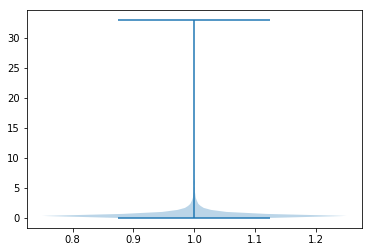

In [16]:
#输出popularity的小提琴图

fig, axes = plt.subplots()
axes.violinplot(df['popularity'])
plt.show()

In [17]:
#对离群点进行输出查看

df[df['popularity']>20]

,id,imdb_id,popularity,budget,original_title,runtime,genres,release_date,vote_average,release_year,budget_adj
0,135397,tt0369610,32.985763,150000000,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015-01-01,1.379999e+08
1,76341,tt1392190,28.419936,150000000,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015-01-01,1.379999e+08
629,157336,tt0816692,24.949134,165000000,Interstellar,169,Adventure|Drama|Science Fiction,2014-11-05,8.0,2014-01-01,1.519800e+08


#### 从上图可以看出：  
1.popularity大部分数值集中在0-5内，少量数据分布在5-35的范围内；  
2.由于popularity具有不规则分布的特性，所以上图分布属于正常；  
3.对于popularity中的三个离群点输出查看，Jurassic World由于有1993年的侏罗纪公园做背书，流行程度这么高不算异常值；  
4.疯狂麦克斯流行程度如此之高的原因不仅在于主演阵容强大，而且该片在场景营造和画面剪辑上也可圈可点，所以该数据被视为正常；  
5.星际穿越从2014年上映的火热程度就可以理解为什么流程程度数值为24。  

#### 数据可视化呈现：

Text(0.5,1,'The Scatter of Runtime&Popularity')

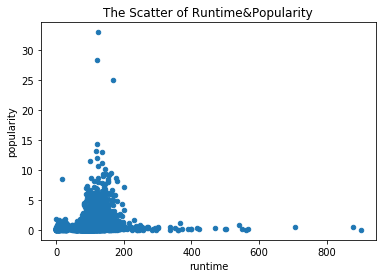

In [22]:
# 分别输出popularity与runtime，budget_adj，vote_average的散点图

df.plot(x='runtime',y='popularity',kind='scatter');
plt.title('The Scatter of Runtime&Popularity', fontsize=12)

Text(0.5,1,'The Scatter of Buget&Popularity')

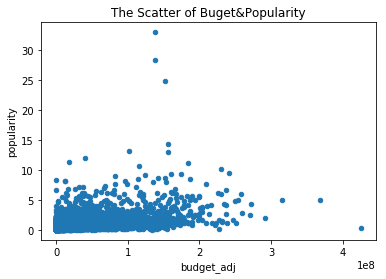

In [25]:
df.plot(x='budget_adj',y='popularity',kind='scatter');
plt.title('The Scatter of Buget&Popularity', fontsize=12)

Text(0.5,1,'The Scatter of Vote&Popularity')

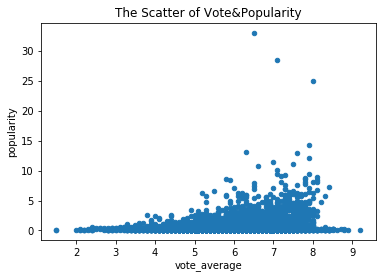

In [26]:
df.plot(x='vote_average',y='popularity',kind='scatter');
plt.title('The Scatter of Vote&Popularity', fontsize=12)

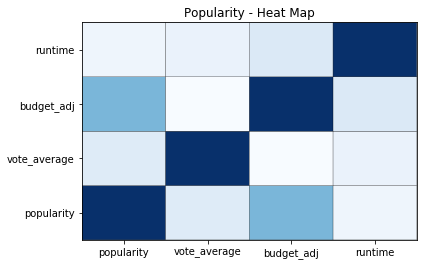

In [28]:
# 输出popularity，runtime，budget_adj和vote_average之间的热力图

fig, ax = plt.subplots()
data = df[['popularity','vote_average','budget_adj','runtime']].corr()
ax.pcolor(data, cmap=plt.cm.Blues, edgecolor='k')
ax.set_xticks(np.arange(0, 4)+0.5)
ax.set_yticks(np.arange(0, 4)+0.5)
ax.set_xticklabels(['popularity','vote_average','budget_adj','runtime'], minor=False, fontsize=10)
ax.set_yticklabels(['popularity','vote_average','budget_adj','runtime'], minor=False, fontsize=10)
plt.title('Popularity - Heat Map', fontsize=12)
plt.show()

 ### 分析与结论：  
 #### 根据上面的可视化图形可以得出以下调查结果：  
 1.从散点图可以看出平均评分（vote_average）对流行程度（popularity）的影响比另两者稍强，呈现出正相关的关系；  
   
   
 2.热力图中，预算（budget_adj）与流行程度（popularity）的相关性最强，其次是平均评分（vote_average），相关性最弱的是放映时间（runtime）；  
   
   
 3.由于流行程度（popularity）的计算数值是怎么而来无从得知，所以不能盖棺定论，综合两表的表现，预算（budget_adj）和流行程度（popularity）之间的联系紧密程度最高。

### 研究问题 2 : 2015年上映的电影类别受欢迎程度有何特点？跟2005年相比呢？

In [41]:
#删除电影类型为Unknown的行

df.drop(df[df['genres']=='Unknown'].index.tolist() ,inplace=True)
df.shape

(10842, 11)

In [42]:
#检查是否删除干净

df[df['genres']=='Unknown']

,id,imdb_id,popularity,budget,original_title,runtime,genres,release_date,vote_average,release_year,budget_adj


In [43]:
#使用不重复无顺序的set函数创建电影类型

genres = set()
for i in df['genres']:
    genres = genres | set(i.split('|'))    
print(len(genres),'\n', genres)

20 
 {'Documentary', 'Romance', 'History', 'Adventure', 'Animation', 'Western', 'War', 'Horror', 'Fantasy', 'Science Fiction', 'Drama', 'Comedy', 'Thriller', 'TV Movie', 'Crime', 'Mystery', 'Foreign', 'Family', 'Action', 'Music'}


In [44]:
# 在表的后面为每个电影类别创建一个对应的布尔feature
for genre in genres:
    df[genre] = df.apply(lambda x: 1 if genre in x['genres'] else 0, axis = 1)
df.head(2)

,id,imdb_id,popularity,budget,original_title,runtime,genres,release_date,vote_average,release_year,...,Drama,Comedy,Thriller,TV Movie,Crime,Mystery,Foreign,Family,Action,Music
0,135397,tt0369610,32.985763,150000000,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015-01-01,...,0,0,1,0,0,0,0,0,1,0
1,76341,tt1392190,28.419936,150000000,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015-01-01,...,0,0,1,0,0,0,0,0,1,0


In [46]:
#将2015年的数据取出来建立一个DF

df_15=df[df['release_year'] == '2015-01-01']
df_15.shape

(627, 31)

In [47]:
df_15['popularity'].describe()

count    627.000000
mean       1.033347
std        2.237012
min        0.003920
25%        0.203790
50%        0.396791
75%        0.964706
max       32.985763
Name: popularity, dtype: float64

In [48]:
#在只有2015数据的DF中，
#取出所有popularity大于均值的DF：overpopularity

df_15_op=df_15[df_15['popularity']>1.033347]
df_15_op.shape

(152, 31)

In [49]:
#只保留电影类型

df_15_op.drop(['id','imdb_id','popularity','budget','original_title','runtime','genres','release_date','vote_average','release_year','budget_adj'], axis=1, inplace=True)
df_15_op.head(5)

D:\anaco\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Documentary,Romance,History,Adventure,Animation,Western,War,Horror,Fantasy,Science Fiction,Drama,Comedy,Thriller,TV Movie,Crime,Mystery,Foreign,Family,Action,Music
0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0


In [68]:
#对2005年的数据进行相同的操作
df_05=df[df['release_year'] == '2005-01-01']
df_05.shape

(363, 31)

In [69]:
df_05['popularity'].describe()

count    363.000000
mean       0.630140
std        0.704837
min        0.000973
25%        0.227339
50%        0.417040
75%        0.755358
max        5.939927
Name: popularity, dtype: float64

In [70]:
df_05_op=df_05[df_05['popularity']>0.630140]
df_05_op.shape

(119, 31)

In [71]:
df_05_op.drop(['id','imdb_id','popularity','budget','original_title','runtime','genres','release_date','vote_average','release_year','budget_adj'], axis=1, inplace=True)

D:\anaco\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Popularity Index')

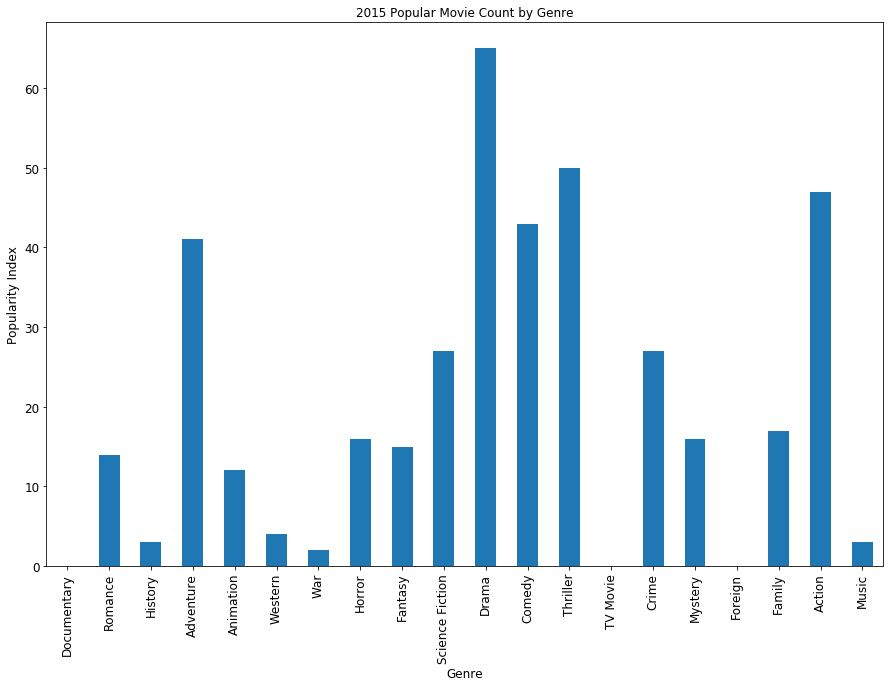

In [59]:
#分别输出2015年和2005年的电影类别流行直方图

ax = df_15_op.apply(sum).plot(kind='bar', title ="2015 Popular Movie Count by Genre",figsize=(15,10),legend=False, fontsize=12)
ax.set_xlabel("Genre",fontsize=12)
ax.set_ylabel("Popularity Index",fontsize=12)


Text(0,0.5,'Popularity Index')

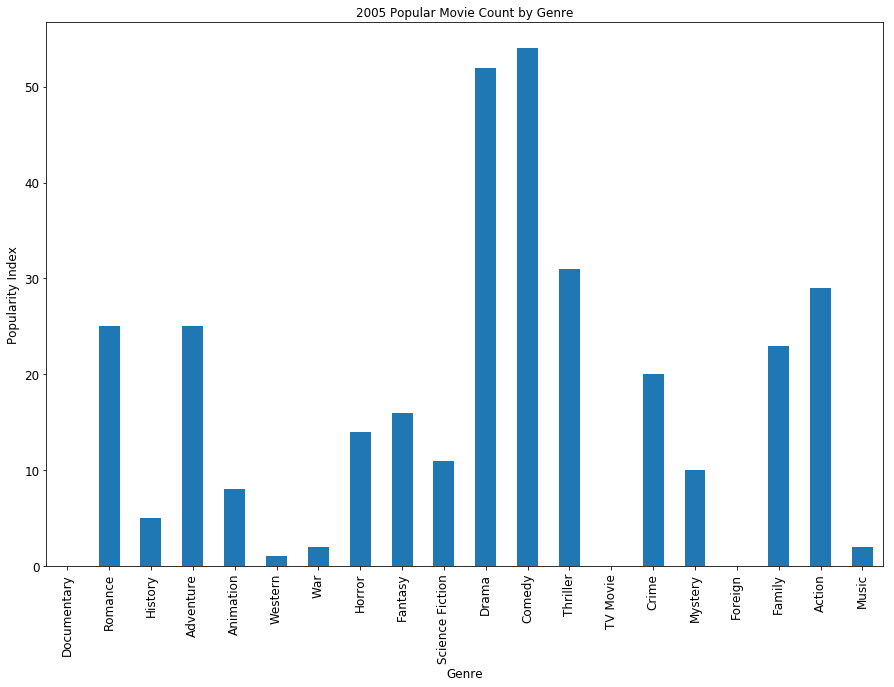

In [72]:
ax = df_05_op.apply(sum).plot(kind='bar', title ="2005 Popular Movie Count by Genre",figsize=(15,10),legend=False, fontsize=12)
ax.set_xlabel("Genre",fontsize=12)
ax.set_ylabel("Popularity Index",fontsize=12)


### 分析与结论：
#### 根据2015和2005年的条形图对比可以得出以下调查结果：
1.通过两图看出Drama的形式非常受欢迎，有点出乎意料，在了解了原始数据和再维基百科上调查得知，大部分电影都有Drama的影子，比如荒野求生和末日崩塌这种冒险和动作电影都有Drama的元素，所以Drama在15和05年在条形图中都呈现很高的数值； 
  
  
2.15年对比05年喜剧类型的电影的受欢迎程度略有下降，而Adventure和Action的电影的流行程度持续上升； 
  
  
3.无一例外，15年和05年不受大众喜爱的类型是Documentary，TV Movie，Foreign这三大类，可能是因为他们都偏小众的原因，很难大肆流行；  
  
  
4.总得来说这十年的趋势中，Drama，Comedy和Thriller这三种电影形式受欢迎程度比较高，其次是Adventure和Action，流行程度没有那么高的为Documentary，TV Movie，Foreign和History，War，Western，Music等小众电影和纪录片。

<a id='conclusions'></a>
## 结论

> 正如上面研究分析所说，如果我想拍出一个非常受欢迎的电影，首先我会多多关注预算，取预算与流行程度相关最密切的点，作为我的预算，并将电影定位在Drama，Comedy，Thriller，Adventure和Action这几个形式当中。  

> __局限性：__我想说清楚的是，这个解决方案还是有些粗糙，比如报告中对电影类型的趋势分析只是基于2005年和2015年的两年数据，对2018年电影类型的流行程度预测有限；或者研究中没有研究到不同演员或者不同导演对电影是否流行的影响，也许这些变量对流行性的相关性也很大。当然，上面只是对导致不同结果的例子而已，还是有很多因素需要考虑到！

In [73]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295